In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Career Per Game DF

In [2]:
# Read in nhl_career_per_game df from main Capstone Notebook
nhl_career_per_game = pd.read_csv("C:/Users/joshm/Documents/BrainStation/nhl_career_per_game.csv", index_col=0)
nhl_career_per_game

,GP,TOI/GP,G/60,A/60,G/GP,A/GP,PTS/GP,Shots/GP,PPG/GP,PPA/GP,EvnG/GP,EvnA/GP
Player,,,,,,,,,,,,
A.J. Greer,93,8.34,0.46,0.85,0.06,0.12,0.18,0.95,0.00,0.00,0.06,0.12
Aaron Downey,119,5.02,0.40,0.70,0.03,0.06,0.09,0.39,0.00,0.00,0.03,0.06
Aaron Ekblad,625,23.00,0.46,0.91,0.18,0.35,0.53,2.54,0.06,0.11,0.11,0.24
Aaron Gagnon,19,8.05,0.00,0.78,0.00,0.11,0.11,0.47,0.00,0.00,0.00,0.11
Aaron Johnson,252,14.54,0.25,0.64,0.06,0.15,0.21,0.88,0.01,0.02,0.05,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...
Éric Gélinas,188,15.35,0.29,0.85,0.07,0.22,0.29,1.70,0.05,0.11,0.03,0.11
Éric Perrin,241,16.37,0.49,1.10,0.13,0.30,0.43,1.58,0.02,0.04,0.10,0.20
Ľubomír Višňovský,615,22.59,0.44,1.21,0.16,0.46,0.62,1.84,0.07,0.25,0.10,0.20


In [3]:
nhl_career_per_game['GP']

Player
A.J. Greer            93
Aaron Downey         119
Aaron Ekblad         625
Aaron Gagnon          19
Aaron Johnson        252
                    ... 
Éric Gélinas         188
Éric Perrin          241
Ľubomír Višňovský    615
Štefan Ružička        40
Žigmund Pálffy        42
Name: GP, Length: 2396, dtype: int64

In [4]:
df = nhl_career_per_game[nhl_career_per_game['GP'] >= 100]
df.sort_values(by='GP', ascending=False)

,GP,TOI/GP,G/60,A/60,G/GP,A/GP,PTS/GP,Shots/GP,PPG/GP,PPA/GP,EvnG/GP,EvnA/GP
Player,,,,,,,,,,,,
Ryan Suter,1362,24.67,0.18,1.00,0.08,0.41,0.49,1.66,0.03,0.16,0.05,0.24
Alex Ovechkin,1347,20.83,1.76,1.42,0.61,0.49,1.10,4.72,0.22,0.19,0.38,0.30
Brent Burns,1297,22.76,0.50,1.20,0.19,0.45,0.64,2.82,0.06,0.16,0.12,0.28
Anže Kopitar,1292,20.98,0.87,1.66,0.30,0.58,0.88,2.40,0.09,0.22,0.21,0.35
Phil Kessel,1286,17.70,1.09,1.53,0.32,0.45,0.77,2.99,0.09,0.17,0.23,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...
Nikolay Goldobin,101,13.99,0.64,1.10,0.15,0.26,0.41,1.53,0.03,0.08,0.12,0.17
Ryan Parent,101,15.87,0.04,0.22,0.01,0.06,0.07,0.45,0.00,0.00,0.01,0.06
Jeff Giuliano,101,10.84,0.16,0.55,0.03,0.10,0.13,0.61,0.00,0.00,0.03,0.09


In [5]:
df['GP'].value_counts()

GP
170     10
138     10
150      9
113      8
153      8
        ..
720      1
757      1
487      1
600      1
1211     1
Name: count, Length: 712, dtype: int64

## Train/Test Split

In [6]:
# allocating X and y variables
y = nhl_career_per_game['G/GP']
X = nhl_career_per_game.drop(columns=['GP', 'G/GP']) # every column except 'G'

# Split the data into train &  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [7]:
# instantiating the pipeline

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

estimators = [('scaler', StandardScaler()),
              ('PCA', PCA())]

per_game_pipe = Pipeline(estimators, verbose=True)

In [12]:
per_game_pipe.score

<function sklearn.pipeline.Pipeline.score(self, X, y=None, sample_weight=None)>

In [8]:
from sklearn.model_selection import GridSearchCV

params = {'scaler': [StandardScaler()], 
          'PCA__n_components': [1, 2, 3, 4, 5, 6]}

per_game_pipe_grid = GridSearchCV(per_game_pipe, param_grid=params)

In [9]:
avg_val_score = np.mean(cross_val_score(per_game_pipe_grid, X_train, y_train, cv=5))
avg_val_score

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipel

-4.662208563611294

In [10]:
# Fitting the pipline to train data

per_game_pipe_grid.fit(X_train, y_train)

print(f'Train score: {per_game_pipe_grid.score(X_train, y_train)}')
print(f'Test score: {per_game_pipe_grid.score(X_test, y_test)}')

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipel

In [45]:
# Instantiate a Feed Forward neural network
nhl_nn_model = Sequential()

# dense layers
nhl_nn_model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
nhl_nn_model.add(Dense(40, activation='relu'))
nhl_nn_model.add(Dense(30, activation='relu'))
nhl_nn_model.add(Dense(20, activation='relu'))
nhl_nn_model.add(Dense(10, activation='relu'))

# Single node output as this is regression
nhl_nn_model.add(Dense(1)) # Default activation is linear, no need to define any activation function here

# Compile the model
nhl_nn_model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.MeanSquaredError(), # MSE loss function
             metrics=[MeanSquaredError()]) # MSE evaluation metric

### Fitting NN

In [46]:
# Training for 50 epochs
history = nhl_nn_model.fit(X_train, y_train, epochs=20, verbose=True)

# Grab the prediction data
y_pred = nhl_nn_model.predict(X_test)

# empty list to accept loss values over epochs
mse_list = []

# append loss values to list
mse_list = mse_list + history.history['mean_squared_error']

Epoch 1/20
53/53 [==============================] - 1s 1ms/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 2/20
53/53 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 3/20
53/53 [==============================] - 0s 1ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/20
53/53 [==============================] - 0s 923us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/20
53/53 [==============================] - 0s 866us/step - loss: 8.4657e-04 - mean_squared_error: 8.4657e-04
Epoch 6/20
53/53 [==============================] - 0s 904us/step - loss: 7.0308e-04 - mean_squared_error: 7.0308e-04
Epoch 7/20
53/53 [==============================] - 0s 866us/step - loss: 4.2627e-04 - mean_squared_error: 4.2627e-04
Epoch 8/20
53/53 [==============================] - 0s 962us/step - loss: 3.5913e-04 - mean_squared_error: 3.5913e-04
Epoch 9/20
53/53 [==============================] - 0s 868us/step - loss: 2.4491e-04 - mean_sq

### Calculating MSE and RMSE

In [73]:
print(y_test.shape)
y_pred = y_pred.reshape((719,))
print(y_pred.shape)

(719,)
(719,)


In [74]:
 mse = np.mean(np.square(y_test - y_pred))

In [75]:
# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.014344908701114704


This is the root mean squared error for actual G/GP values vs the predicted G/GP (test set)

### Plotting loss

KeyError: 'val_loss'

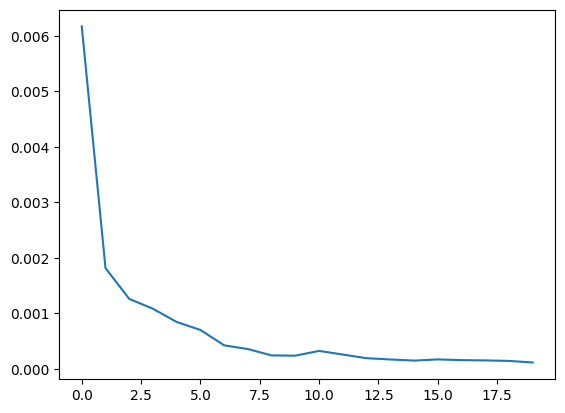

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [77]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = nhl_nn_model.evaluate(X_test, y_test, verbose=0)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {result:.4f}")

y_pred = nhl_nn_model.predict(X_test)

Train Loss: 0.0001


TypeError: unsupported format string passed to list.__format__

In [78]:
len(mse_list)

20

### Plotting MSE vs Epochs

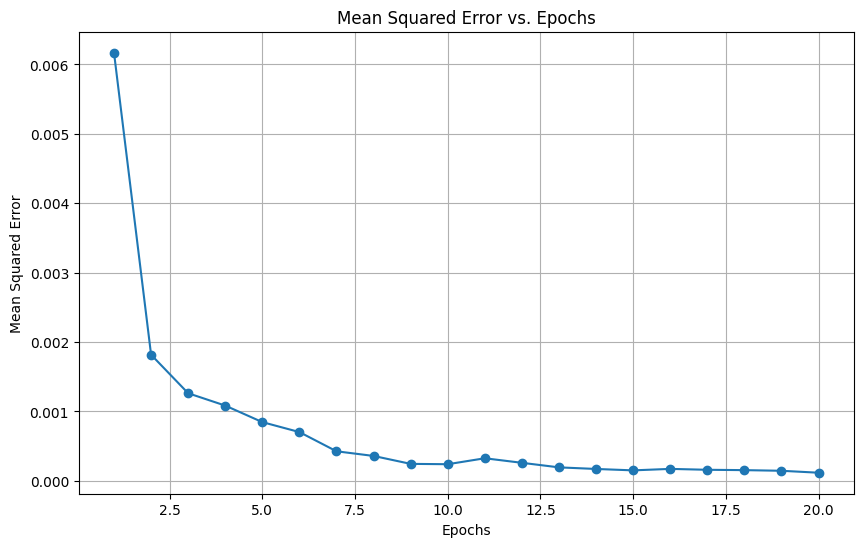

In [79]:
mse_values = [...]  # Replace [...] with your actual MSE values

# Generate epochs (assuming starting from epoch 1)
epochs = range(1, len(mse_list) + 1)

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(epochs, mse_list, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epochs')
plt.grid(True)
plt.show()

In [80]:
nhl_nn_model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 956us/step - loss: 2.0578e-04 - mean_squared_error: 2.0578e-04


[0.00020577642135322094, 0.00020577642135322094]

In [81]:
type(y_train)

pandas.core.series.Series

In [82]:
type(X_train)

pandas.core.frame.DataFrame

In [83]:
# converting X_train into a numpy array for fitting the NN model
X_train_array = X_train.values
type(X_train_array)

numpy.ndarray

In [84]:
y_pred.shape

(719,)

### Plotting G/GP against all independent features (Predicted and Actual) 

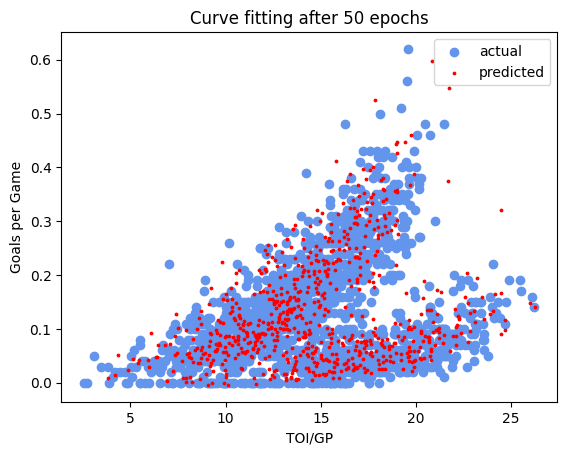

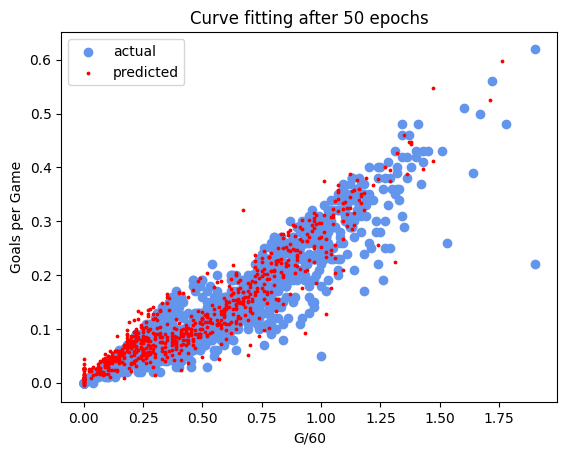

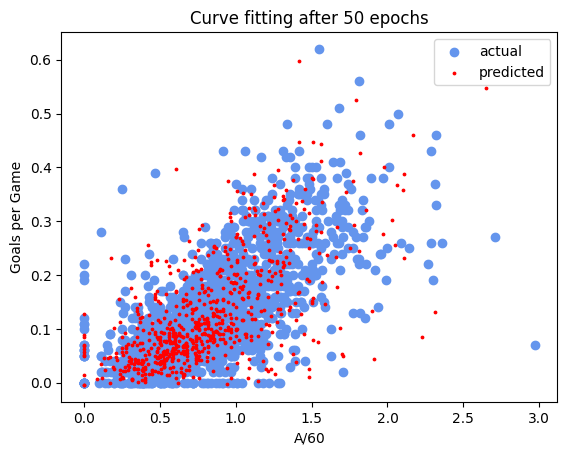

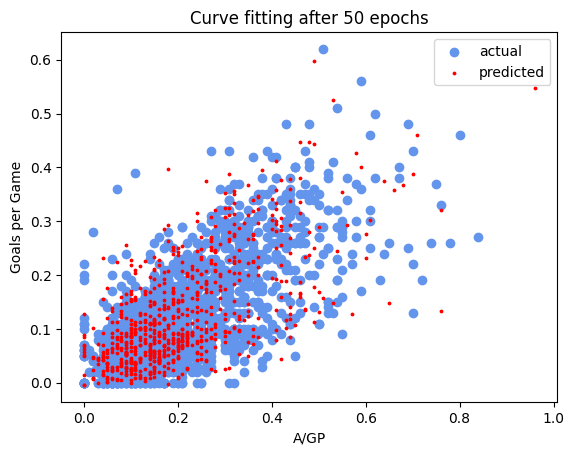

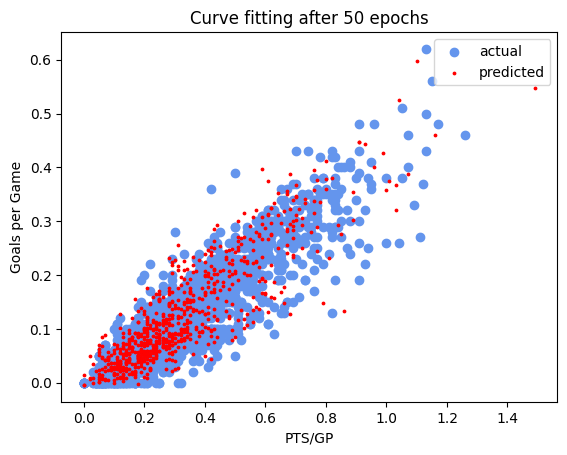

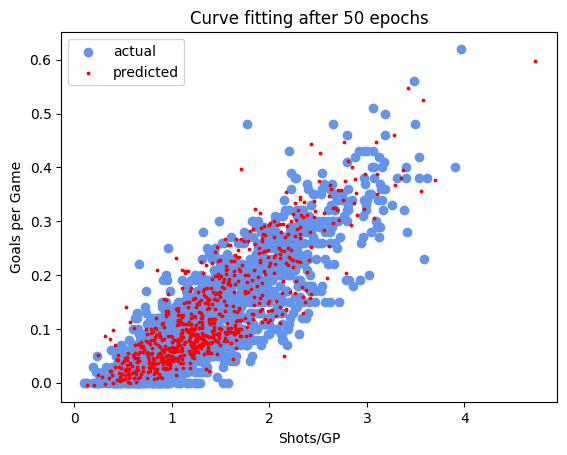

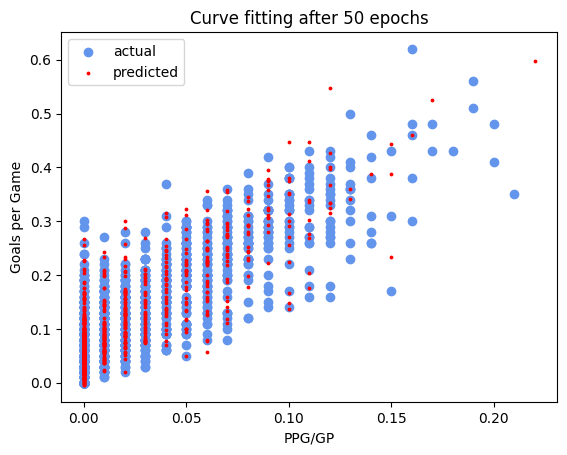

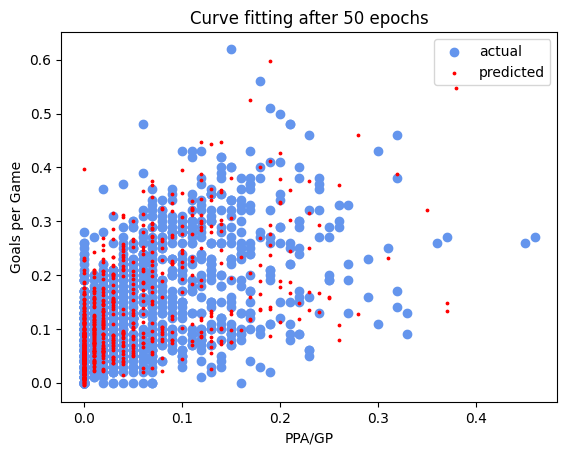

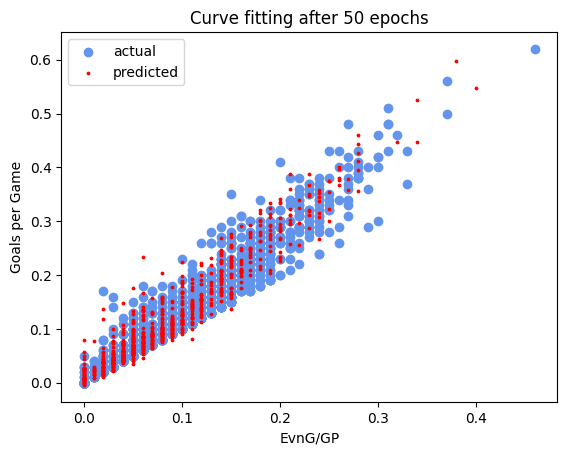

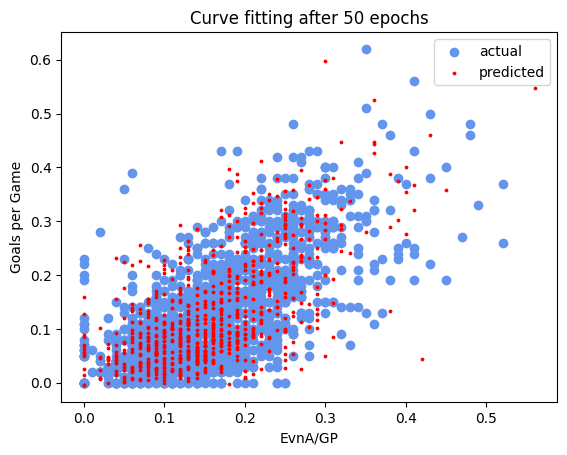

Mean Squared Error (MSE) for 50 epochs:  0.00011739505134755746


In [85]:
# Plotting target feature vs independent features - Actual vs Predicted
for col in X_train.columns:
    # Plot actual vs. predicted values for each feature
    plt.figure()
    plt.scatter(X_train[col], y_train, label='actual', c="cornflowerblue")  # Plot the actual data
    plt.scatter(X_test[col], y_pred, s=3, color='r', label='predicted')  # Plot the predicted values
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Goals per Game')
    plt.title(f'Curve fitting after 50 epochs')
    plt.show()

# Error for the one epoch
print('Mean Squared Error (MSE) for 50 epochs: ', mse_list[-1])

In [86]:
X_test.shape

(719, 10)

In [87]:
y_pred.shape

(719,)

In [88]:
X_train_array.shape

(1677, 10)

In [89]:
X_test['TOI/GP']

Player
Drew Larman           7.38
Chris Wideman        13.88
Victor Rask          14.97
Jan Hlaváč           15.15
Teemu Hartikainen    11.60
                     ...  
Peter Cehlárik       12.60
Elias Pettersson     18.98
Lasse Pirjetä         9.24
Nikita Soshnikov     10.89
Saku Mäenalanen      10.02
Name: TOI/GP, Length: 719, dtype: float64

In [90]:
X_test.columns

Index(['TOI/GP', 'G/60', 'A/60', 'A/GP', 'PTS/GP', 'Shots/GP', 'PPG/GP',
       'PPA/GP', 'EvnG/GP', 'EvnA/GP'],
      dtype='object')

#### Plotting same thing as above...

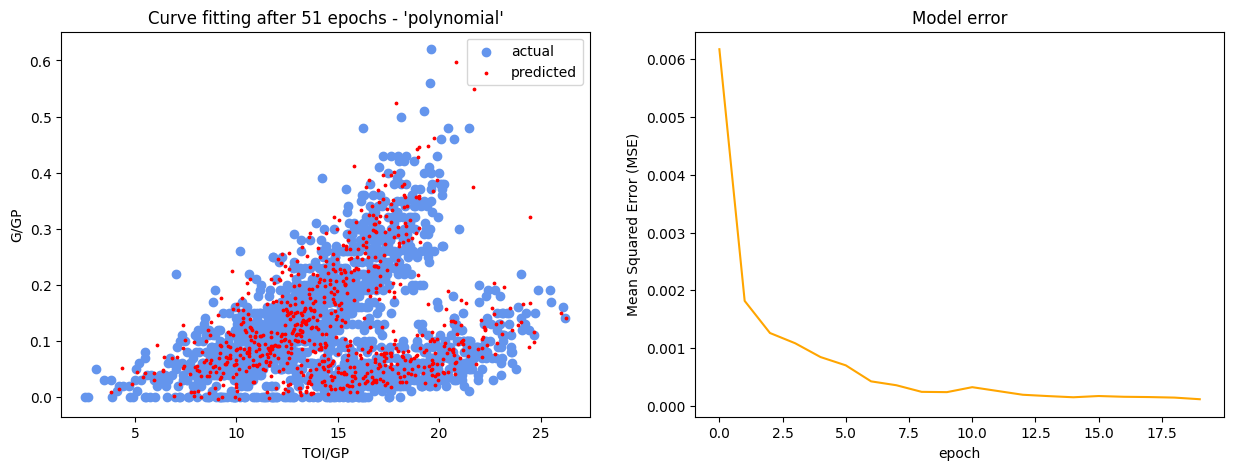

Mean Squared Error (MAE) after 51 epochs:  0.00011739505134755746


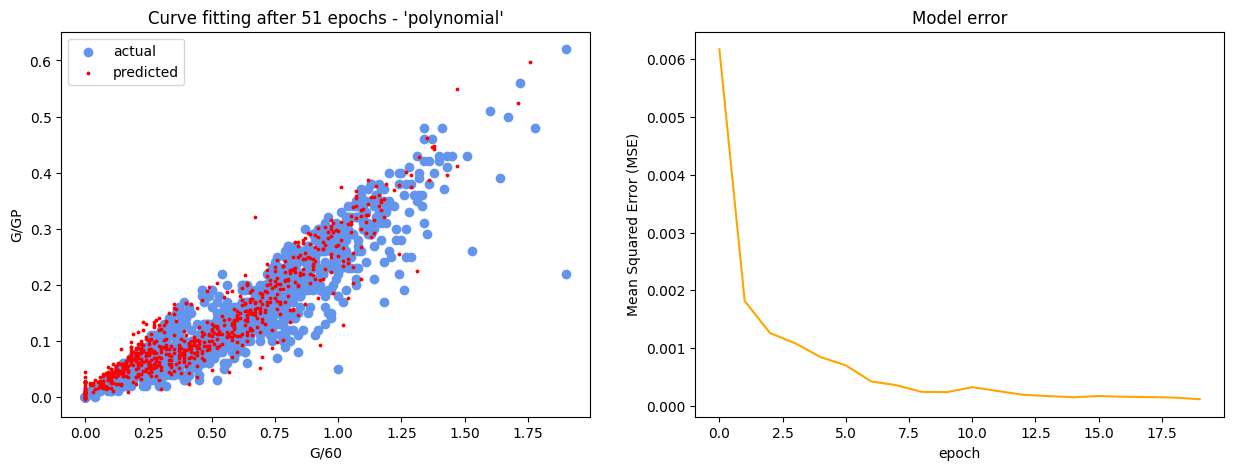

Mean Squared Error (MAE) after 51 epochs:  0.00011739505134755746


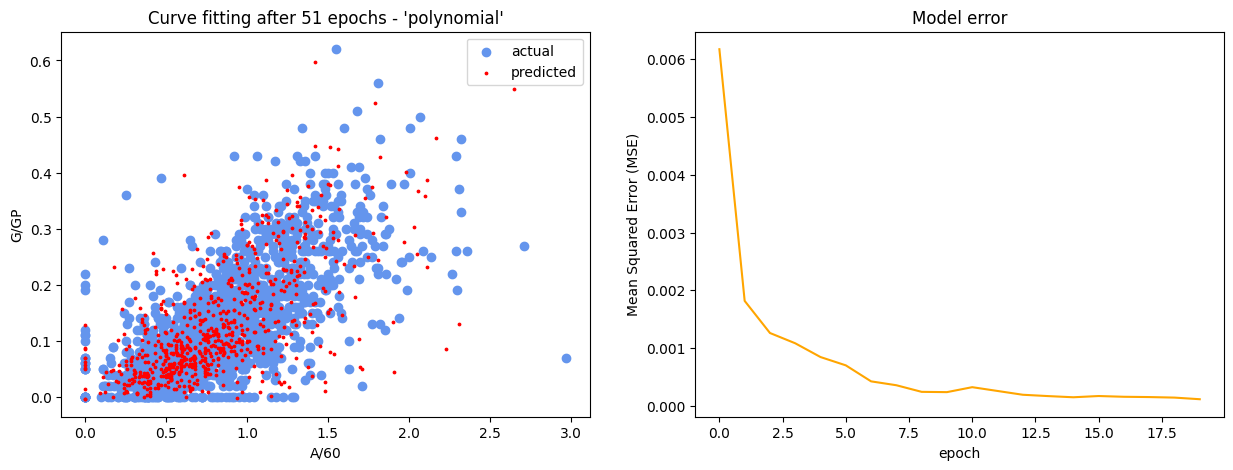

Mean Squared Error (MAE) after 51 epochs:  0.00011739505134755746


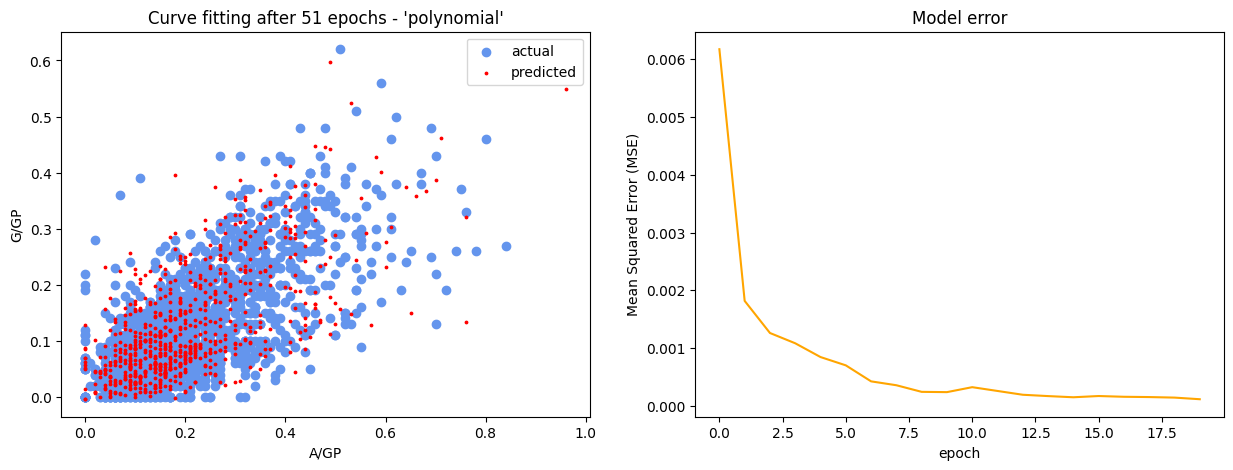

Mean Squared Error (MAE) after 51 epochs:  0.00011739505134755746


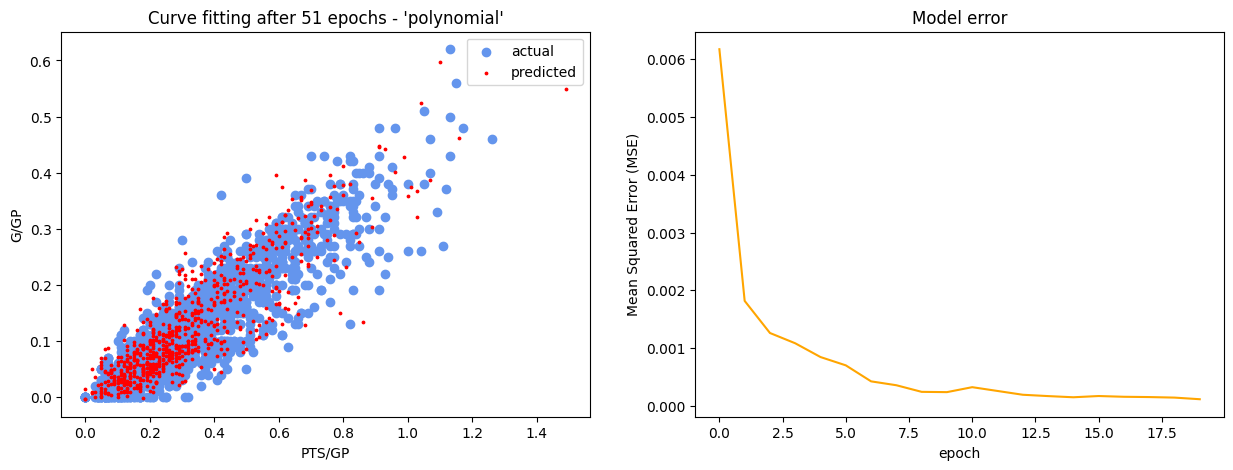

Mean Squared Error (MAE) after 51 epochs:  0.00011739505134755746


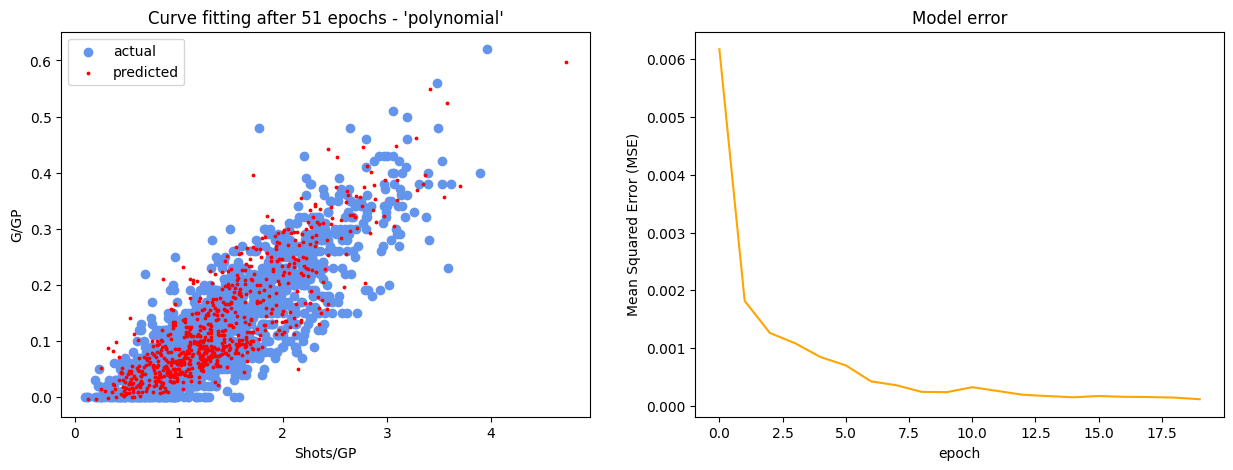

Mean Squared Error (MAE) after 51 epochs:  0.00011739505134755746


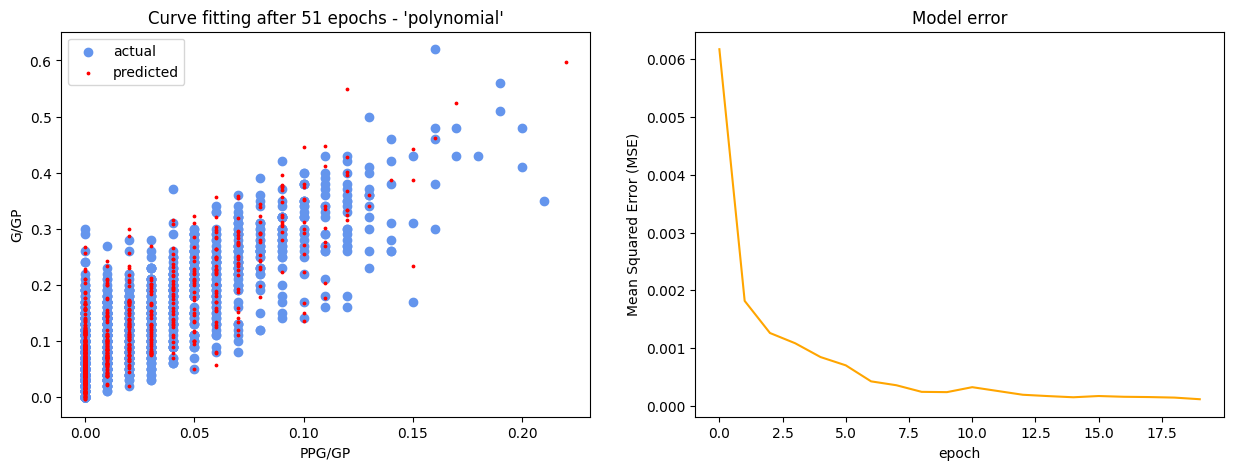

Mean Squared Error (MAE) after 51 epochs:  0.00011739505134755746


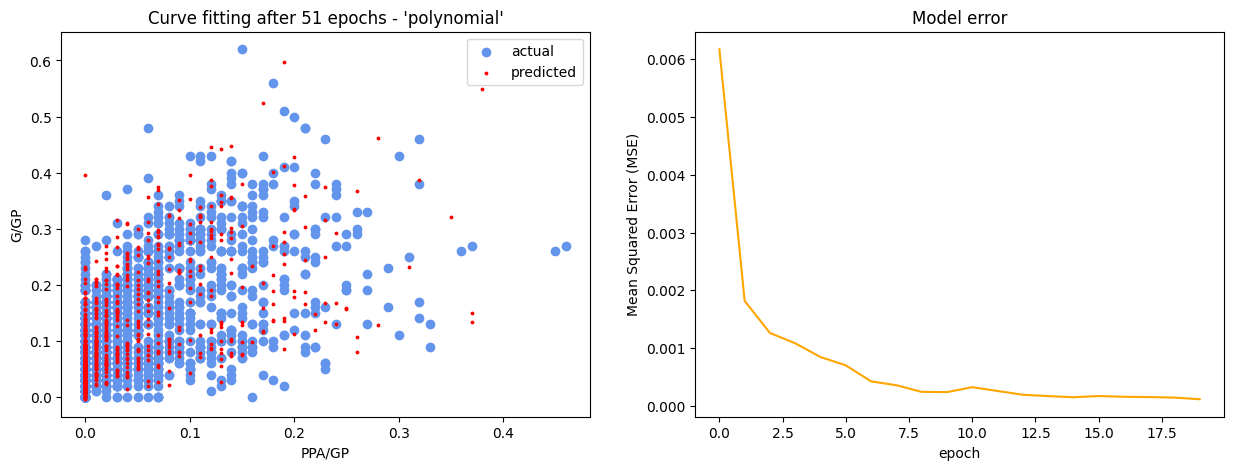

Mean Squared Error (MAE) after 51 epochs:  0.00011739505134755746


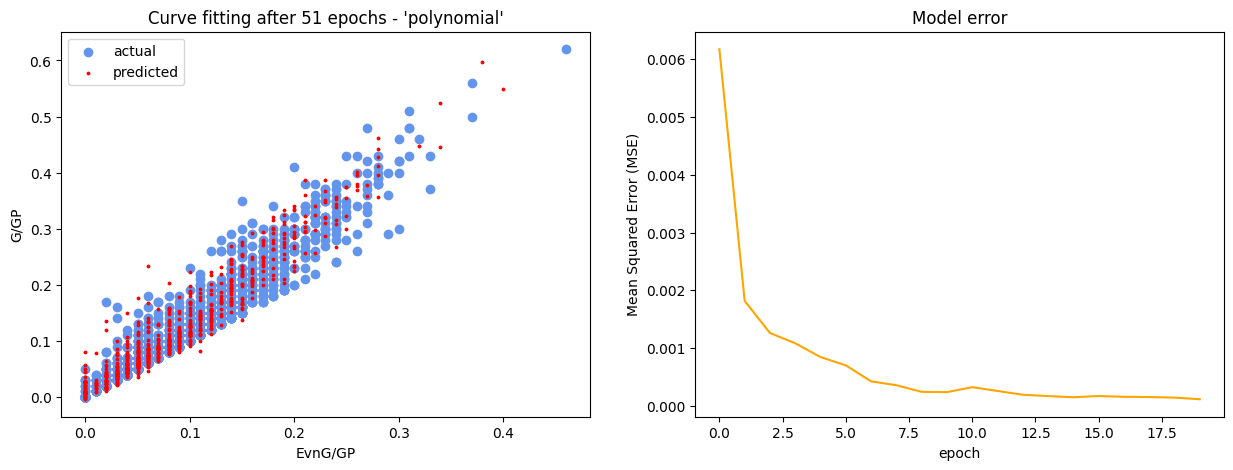

Mean Squared Error (MAE) after 51 epochs:  0.00011739505134755746


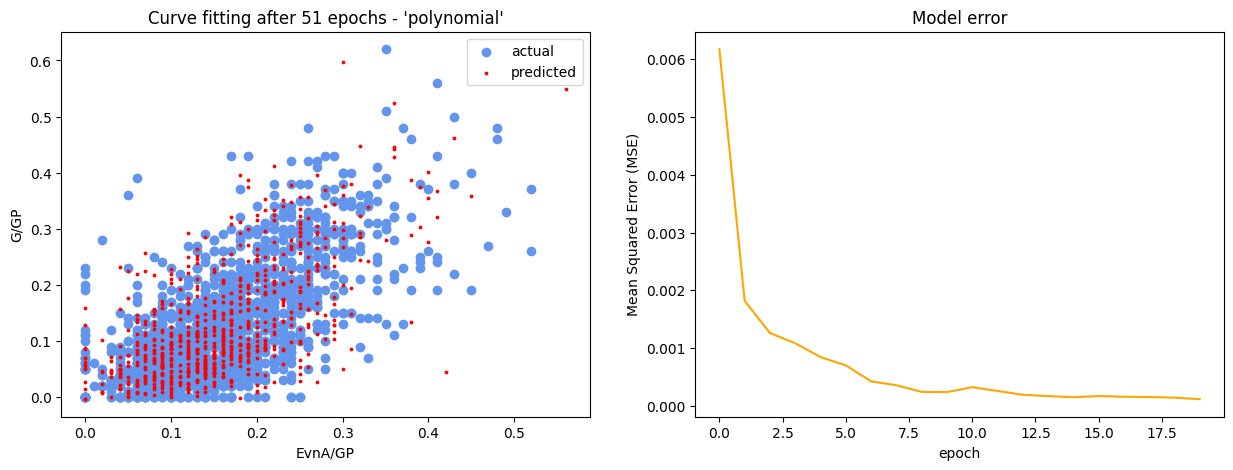

Mean Squared Error (MAE) after 51 epochs:  0.00011739505134755746


In [91]:
for col in X_test.columns:
    plt.subplots(1,2, figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.scatter(X_train[col], y_train, label='actual', c="cornflowerblue") # Plot the actual data
    plt.scatter(X_test[col], y_pred, s=3, color='r', label='predicted') # Plot the predictions
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('G/GP')
    plt.title("Curve fitting after 51 epochs - 'polynomial'")
    
    # Error for each epoch
    plt.subplot(1,2,2)
    plt.plot(mse_list, c='orange')
    plt.title('Model error')
    plt.xlabel('epoch')
    plt.ylabel('Mean Squared Error (MSE)')
    
    # Show
    plt.show()
    
    # Error for the one epoch
    print('Mean Squared Error (MAE) after 51 epochs: ', history.history['mean_squared_error'][-1])

### Visualizing Predicted vs Actual for test set

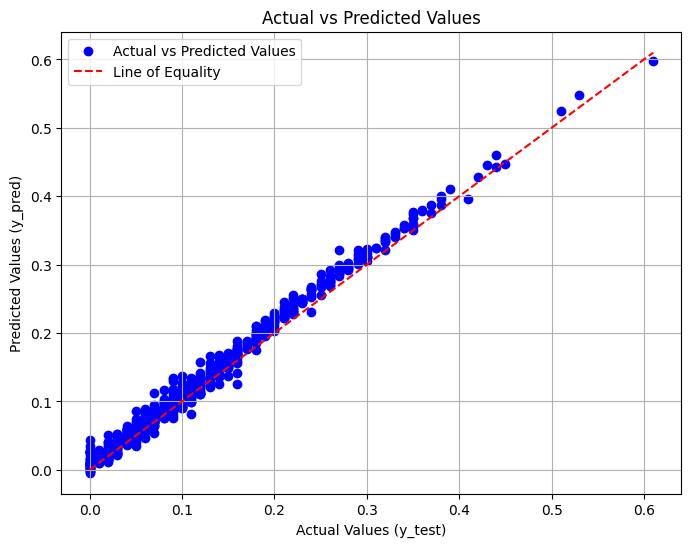

In [98]:
# Plot y_pred vs y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Line of Equality')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Plotly/plotly.graph_objects is not working in this environment. Moving along for now

In [93]:
# # Create a DataFrame with y_test and y_pred
# import plotly.express as px 
# import plotly.graph_objects as go
# df = pd.DataFrame({'actual goals/game': y_test, 'predicted goals/game': y_pred})

# # Plot y_test vs y_pred
# fig = px.scatter(df, x='actual goals/game', y='predicted goals/game', title='Actual vs Predicted Values', height=900, hover_name=y_test.index)
# fig.add_trace(go.Scatter(x=[df['actual goals/game'].min(), df['actual goals/game'].max()], y=[df['actual goals/game'].min(), df['actual goals/game'].max()], mode='lines', name='Perfect Prediction'))
# fig.show()

### Creating a table including Difference between Predicted and Actual 

In [94]:
y_pred.shape

(719,)

In [95]:
# y_pred must have shape (741,)
df = pd.DataFrame({'actual goals/game': y_test, 'predicted goals/game': y_pred})
df

,actual goals/game,predicted goals/game
Player,,
Drew Larman,0.12,0.128084
Chris Wideman,0.07,0.080746
Victor Rask,0.18,0.189411
Jan Hlaváč,0.15,0.156786
Teemu Hartikainen,0.08,0.084167
...,...,...
Peter Cehlárik,0.20,0.228785
Elias Pettersson,0.42,0.427623
Lasse Pirjetä,0.16,0.176267


In [96]:
df['Actual Goals'] = round((df['actual goals/game'] * 82), 2)
df['Predicted Goals'] = round((df['predicted goals/game'] * 82), 2)
df['Difference(Actual - Predicted)'] = df['Actual Goals'] - df['Predicted Goals']
df.sort_values(by='Actual Goals', ascending=False).head(20)

,actual goals/game,predicted goals/game,Actual Goals,Predicted Goals,Difference(Actual - Predicted)
Player,,,,,
Alex Ovechkin,0.61,0.597111,50.02,48.959999,1.060001
Connor McDavid,0.53,0.548330,43.46,44.959999,-1.499999
David Pastrňák,0.51,0.524664,41.82,43.020000,-1.200000
Kyle Connor,0.45,0.447523,36.90,36.700001,0.199999
Brayden Point,0.44,0.442898,36.08,36.320000,-0.240000
Evgeni Malkin,0.44,0.460951,36.08,37.799999,-1.719999
Jake Guentzel,0.43,0.446387,35.26,36.599998,-1.339998
Elias Pettersson,0.42,0.427623,34.44,35.070000,-0.630000
Rafaël Harvey-Pinard,0.41,0.396577,33.62,32.520000,1.100000


#### Next I want to run predictions on the entire dataset and visualize

In [74]:
y

Player
A.J. Greer           0.08
Aaron Downey         0.03
Aaron Ekblad         0.17
Aaron Johnson        0.06
Aaron Miller         0.01
                     ... 
Zenon Konopka        0.04
Éric Bélanger        0.16
Éric Gélinas         0.07
Éric Perrin          0.13
Ľubomír Višňovský    0.16
Name: G/GP, Length: 1725, dtype: float64

In [83]:
y_pred_whole

array([0.09449042, 0.03763387, 0.1636679 , ..., 0.06408534, 0.1173626 ,
       0.15420212], dtype=float32)

In [84]:
mse_list[-1]

8.052049088291824e-05

In [85]:
y[1:]

Player
Aaron Downey         0.03
Aaron Ekblad         0.17
Aaron Johnson        0.06
Aaron Miller         0.01
Aaron Rome           0.03
                     ... 
Zenon Konopka        0.04
Éric Bélanger        0.16
Éric Gélinas         0.07
Éric Perrin          0.13
Ľubomír Višňovský    0.16
Name: G/GP, Length: 1724, dtype: float64

In [86]:
y - y_pred_whole

Player
A.J. Greer          -0.014490
Aaron Downey        -0.007634
Aaron Ekblad         0.006332
Aaron Johnson        0.008442
Aaron Miller        -0.003482
                       ...   
Zenon Konopka        0.009719
Éric Bélanger        0.009548
Éric Gélinas         0.005915
Éric Perrin          0.012637
Ľubomír Višňovský    0.005798
Name: G/GP, Length: 1725, dtype: float64

In [87]:
 np.mean(np.square(y - y_pred_whole))

8.069177024922432e-05

In [88]:
y_pred_whole

array([0.09449042, 0.03763387, 0.1636679 , ..., 0.06408534, 0.1173626 ,
       0.15420212], dtype=float32)

In [92]:
# Predict on the test data
y_pred_whole = nhl_nn_model.predict(X)
y_pred_whole = np.reshape(y_pred_whole, (1725,))


# Calculate mean squared error
mse = MeanSquaredError()
print("Mean Squared Error:", mse)

# # Compute the root mean squared error (RMSE)
# rmse = np.sqrt(mse)
# print("Root Mean Squared Error (RMSE):", rmse)

54/54 [==============================] - 0s 793us/step
Mean Squared Error: MeanSquaredError(name=mean_squared_error,dtype=float32)


# Three year weighted average DataFrame with advanced stats added

In [15]:
three_yr_df = pd.read_csv("C:/Users/joshm/Documents/BrainStation/three_yr_df2.csv", index_col=0)
three_yr_df

,Age,GP,G/GP,A/GP,PTS/GP,PPG/GP,PPA/GP,EvnG/GP,EvnA/GP,G/60,...,FF/GP,FA/GP,FF%,SAtt/GP,Thru%,oiSH%,oZS%,dZS%,TK/GP,GV/GP
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Ekblad,27.0,167.0,0.234647,0.226428,0.681598,0.103098,0.192882,0.103098,0.192882,0.579647,...,14.034588,11.469471,55.031373,5.304578,56.255882,9.965686,53.733333,46.266667,0.486578,0.952961
Adam Boqvist,23.0,133.0,0.132637,0.277654,0.477863,0.024167,0.152098,0.024167,0.152098,0.450225,...,10.611480,11.499794,47.976471,2.689206,49.378431,9.970588,63.175490,36.824510,0.223000,0.541706
Adam Erne,28.0,185.0,0.134255,0.118186,0.305284,0.012480,0.012480,0.012480,0.012480,0.594892,...,6.522412,8.619265,43.071569,2.071578,56.084314,8.772549,44.904902,55.095098,0.268137,0.243392
Adam Fox,25.0,215.0,0.134137,0.503778,0.896686,0.012588,0.375167,0.012588,0.375167,0.332167,...,13.313618,11.862804,52.818627,3.732716,52.638235,10.308824,55.094118,44.905882,0.978225,0.804873
Adam Henrique,33.0,165.0,0.329873,0.165023,0.621716,0.069284,0.079471,0.069284,0.079471,1.125000,...,9.326569,10.391088,47.217647,3.604745,59.566667,10.755882,49.402941,50.597059,0.351137,0.462951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Sanford,29.0,148.0,0.133275,0.052304,0.234294,0.014686,0.008088,0.014686,0.008088,0.569618,...,7.304049,8.921147,44.987255,2.548745,50.017647,7.194118,41.726471,58.273529,0.341559,0.403951
Zach Werenski,26.0,116.0,0.202902,0.259611,0.636245,0.019088,0.149686,0.019088,0.149686,0.501196,...,14.792216,14.425176,50.743137,5.690225,52.848039,9.662745,57.704902,42.295098,0.766922,0.626069
Zach Whitecloud,27.0,169.0,0.092931,0.095451,0.247461,0.000000,0.000000,0.000000,0.000000,0.310265,...,10.434127,10.643961,49.375490,2.649490,46.642157,10.186275,45.453922,54.546078,0.303471,0.401745


## Train/Test Split

In [16]:
# allocating X and y variables
y = three_yr_df['G/GP']
X = three_yr_df.drop(columns=['GP', 'G/GP']) # every column except 'G'

# Split the data into train &  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [17]:
# Instantiate a Feed Forward neural network
three_yr_nn_model = Sequential()

# dense layers
three_yr_nn_model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
three_yr_nn_model.add(Dense(40, activation='relu'))
three_yr_nn_model.add(Dense(30, activation='relu'))
three_yr_nn_model.add(Dense(20, activation='relu'))
three_yr_nn_model.add(Dense(10, activation='relu'))

# Single node output as this is regression
three_yr_nn_model.add(Dense(1)) # Default activation is linear, no need to define any activation function here

# Compile the model
three_yr_nn_model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.MeanSquaredError(), # MSE loss function
             metrics=[MeanSquaredError()]) # MSE evaluation metric

### Fitting NN

In [18]:
# Training for 50 epochs
history = three_yr_nn_model.fit(X_train, y_train, epochs=20, verbose=True)

# Grab the prediction data
y_pred = three_yr_nn_model.predict(X_test)

# empty list to accept loss values over epochs
mse_list = []

# append loss values to list
mse_list = mse_list + history.history['mean_squared_error']

Epoch 1/20
14/14 [==============================] - 1s 2ms/step - loss: 133.6271 - mean_squared_error: 133.6271
Epoch 2/20
14/14 [==============================] - 0s 1ms/step - loss: 1.6537 - mean_squared_error: 1.6537
Epoch 3/20
14/14 [==============================] - 0s 1ms/step - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 4/20
14/14 [==============================] - 0s 1ms/step - loss: 0.0765 - mean_squared_error: 0.0765
Epoch 5/20
14/14 [==============================] - 0s 1ms/step - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 6/20
14/14 [==============================] - 0s 1ms/step - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 7/20
14/14 [==============================] - 0s 1ms/step - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 8/20
14/14 [==============================] - 0s 1ms/step - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 9/20
14/14 [==============================] - 0s 1ms/step - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 10/20
14/14 [=====

### Calculating MSE and RMSE

In [20]:
print(y_test.shape)
y_pred = y_pred.reshape((180,))
print(y_pred.shape)

(180,)
(180,)


In [22]:
mse = np.mean(np.square(y_test - y_pred))
mse

0.01665866196020718

In [23]:
# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.1290684390554375


### Plotting loss

KeyError: 'val_loss'

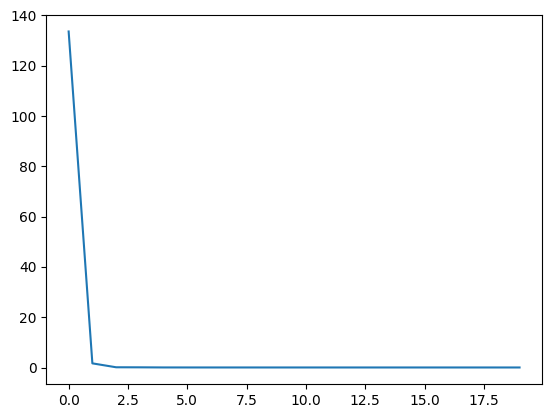

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Plotting MSE vs Epochs

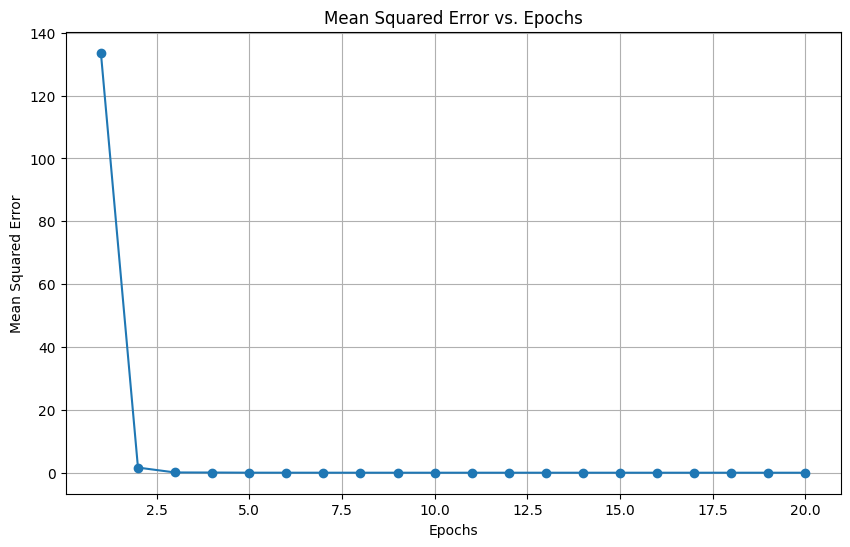

In [25]:
# Generate epochs (assuming starting from epoch 1)
epochs = range(1, len(mse_list) + 1)

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(epochs, mse_list, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epochs')
plt.grid(True)
plt.show()

### Plotting G/GP against all independent features (Predicted and Actual) 

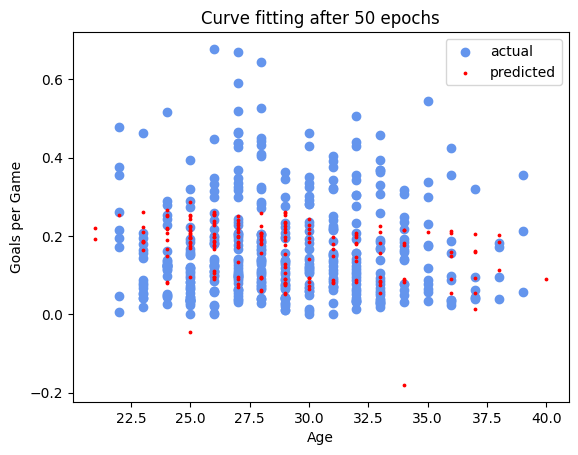

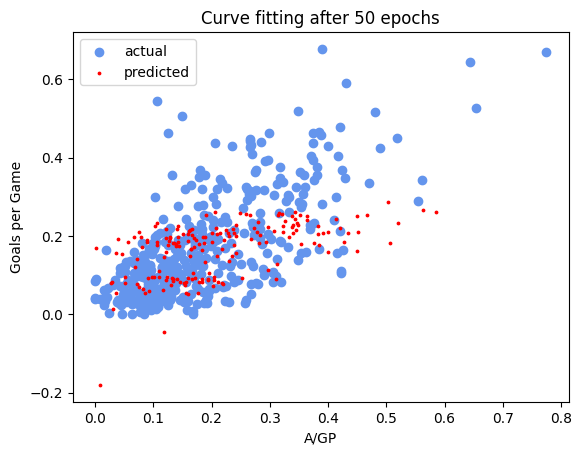

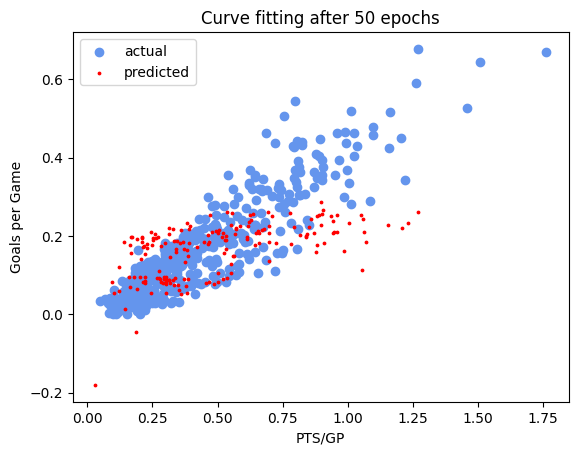

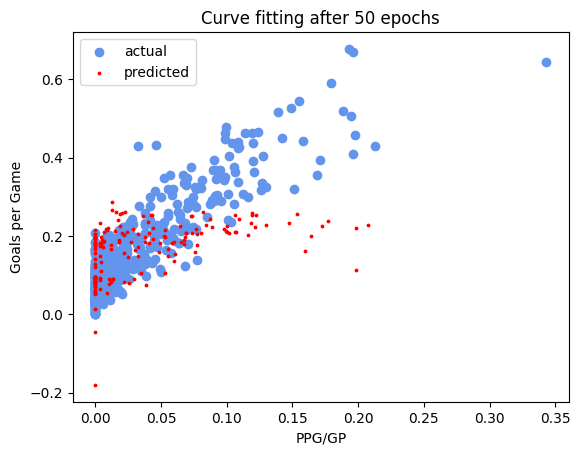

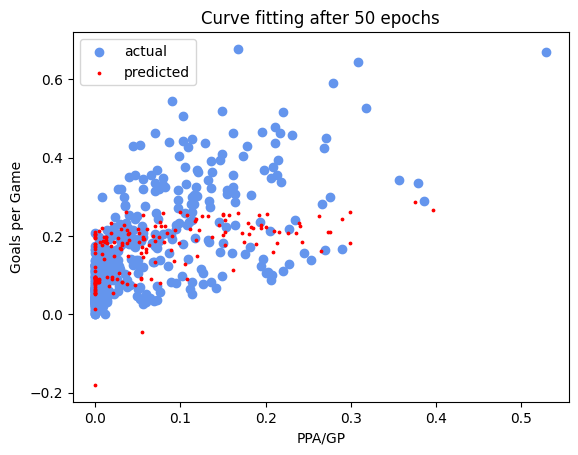

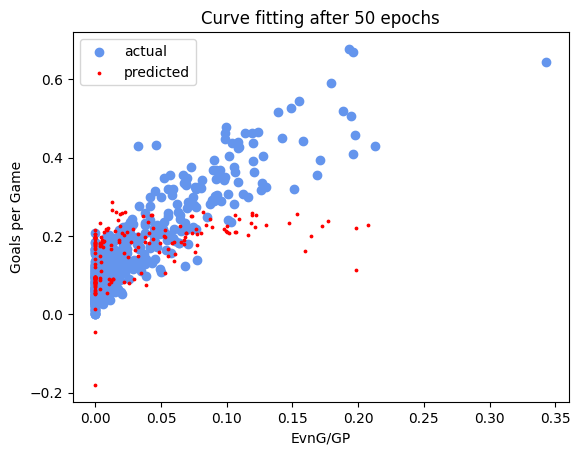

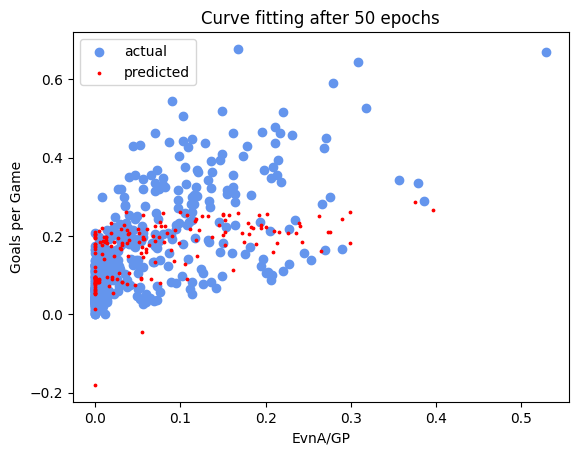

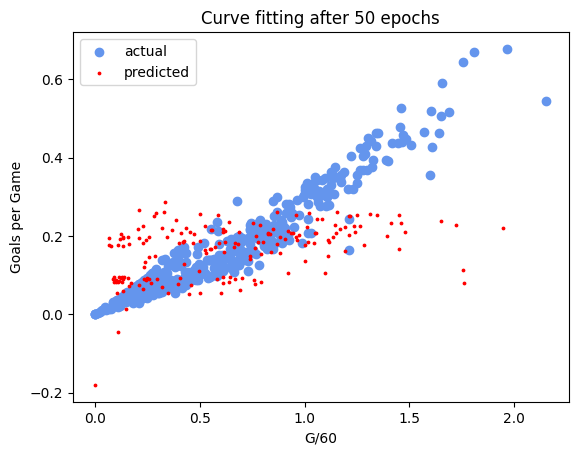

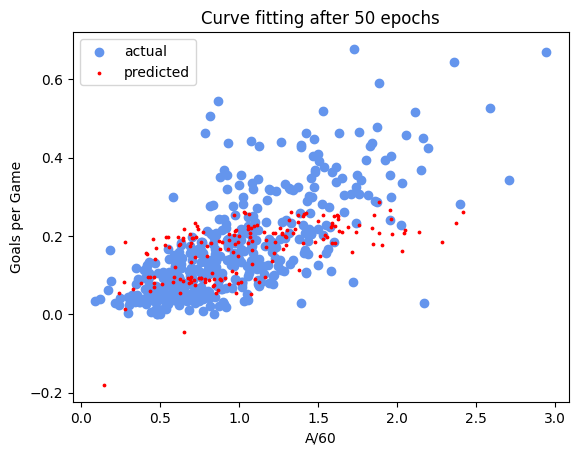

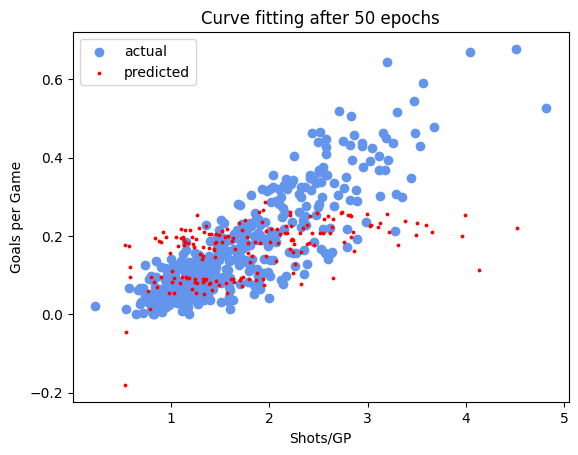

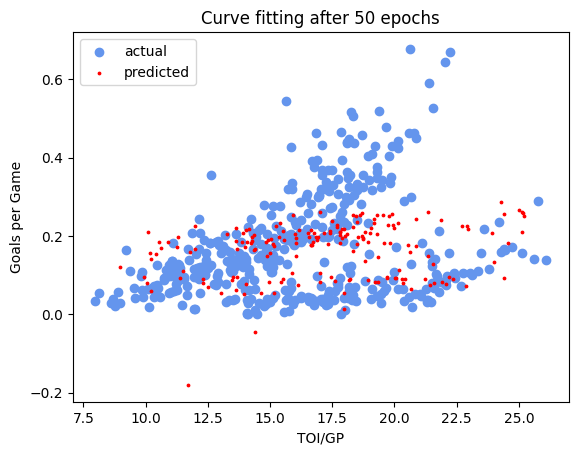

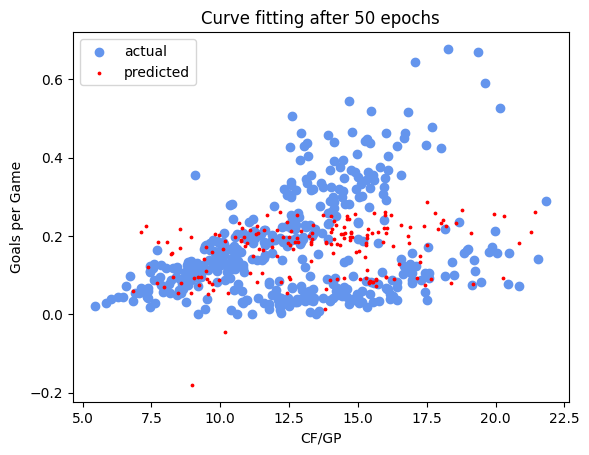

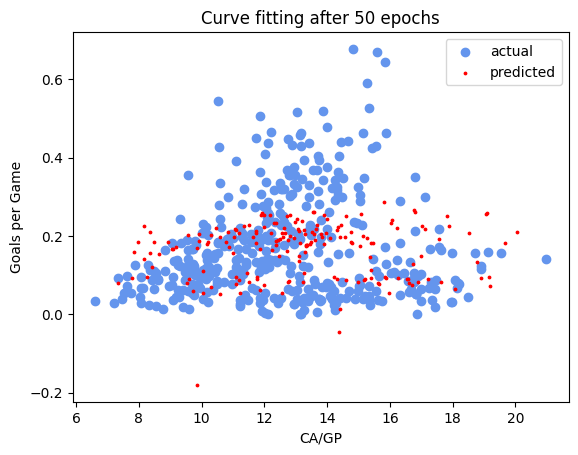

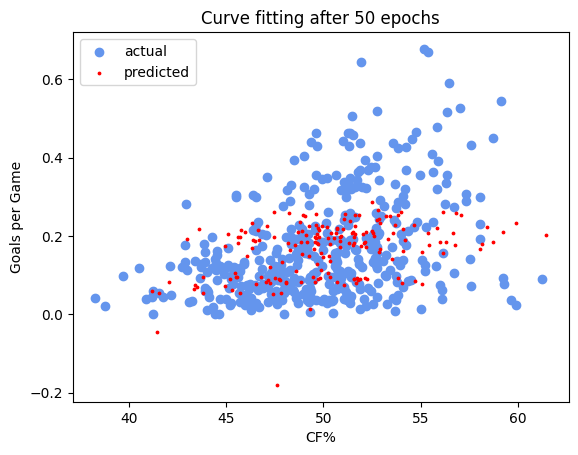

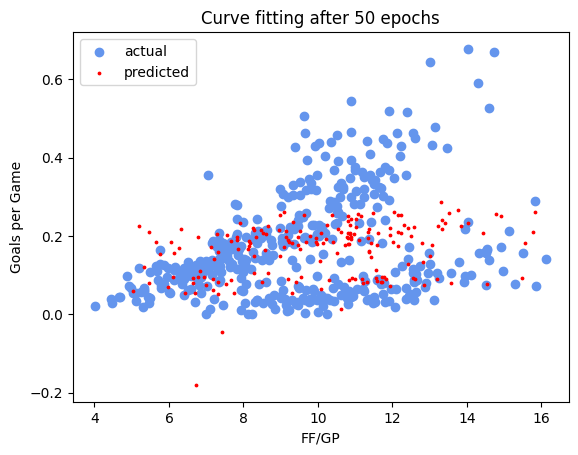

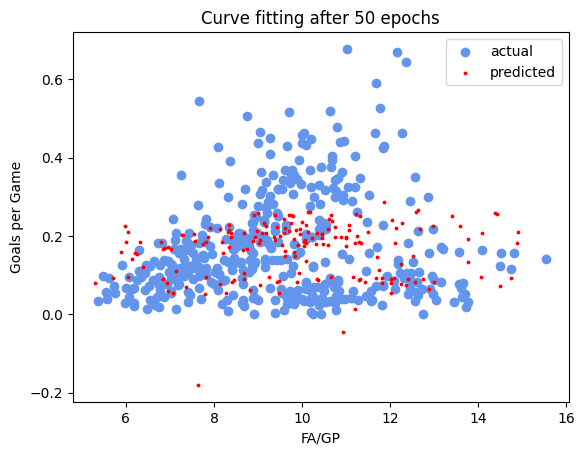

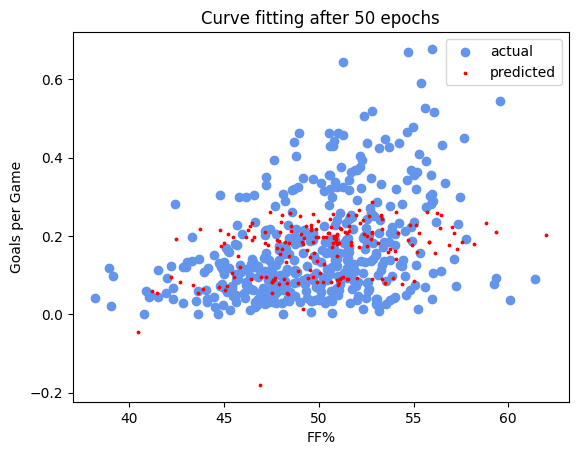

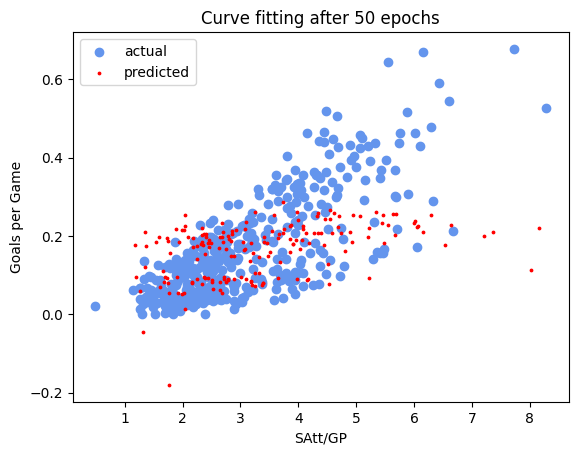

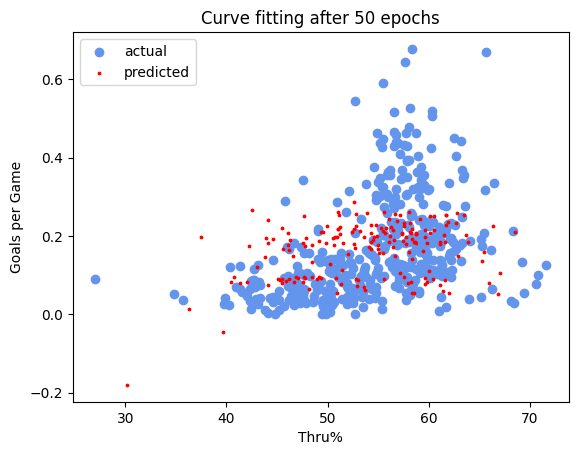

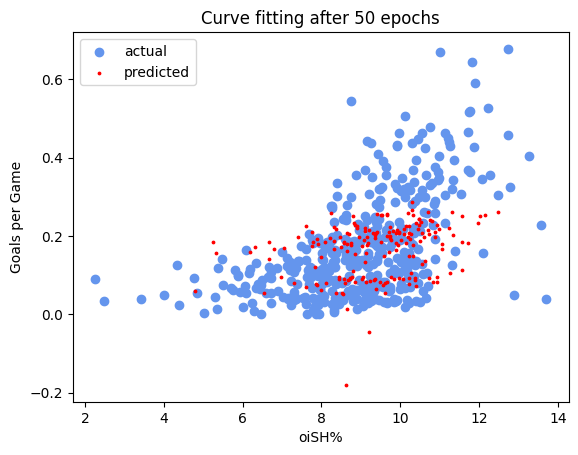

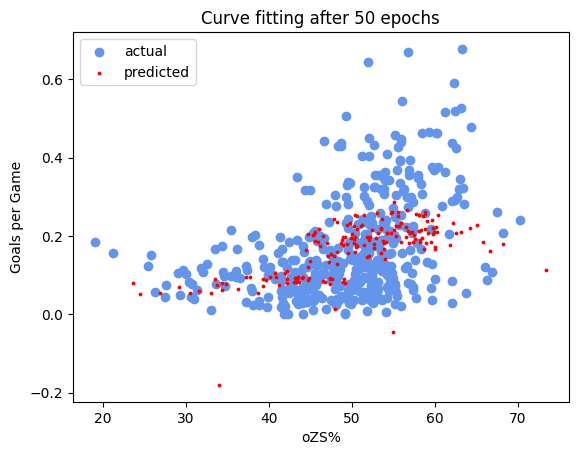

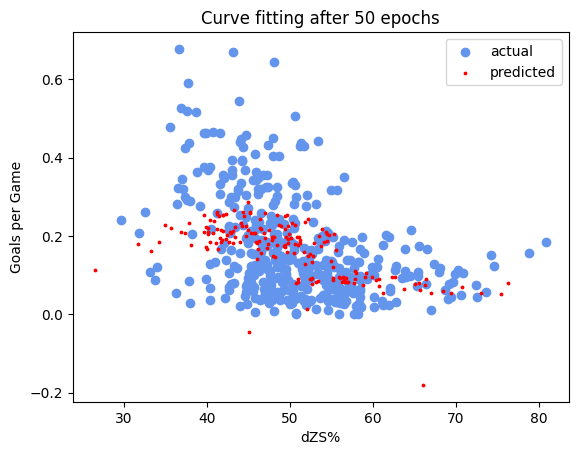

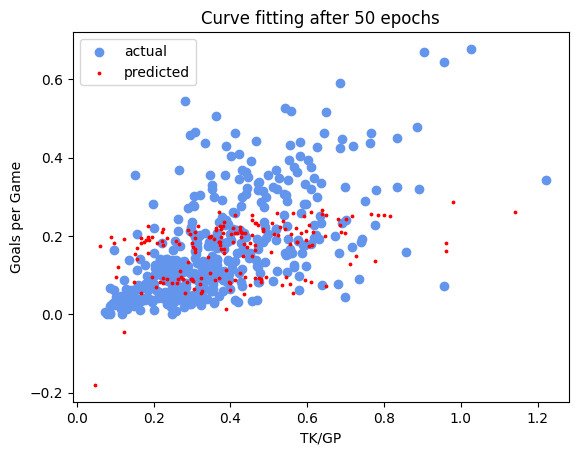

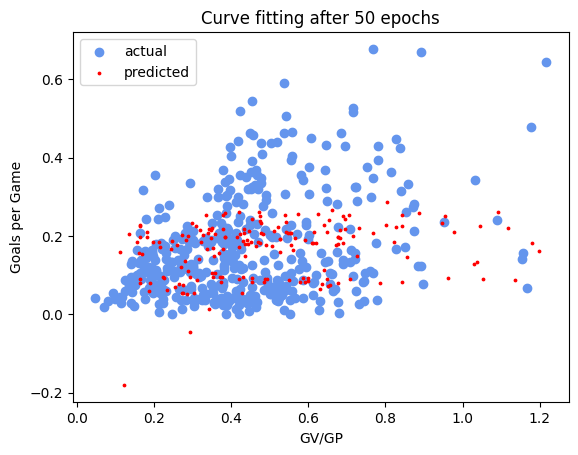

Mean Squared Error (MSE) for 50 epochs:  0.013326970860362053


In [13]:
# Plotting target feature vs independent features - Actual vs Predicted
for col in X_train.columns:
    # Plot actual vs. predicted values for each feature
    plt.figure()
    plt.scatter(X_train[col], y_train, label='actual', c="cornflowerblue")  # Plot the actual data
    plt.scatter(X_test[col], y_pred, s=3, color='r', label='predicted')  # Plot the predicted values
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Goals per Game')
    plt.title(f'Curve fitting after 50 epochs')
    plt.show()

# Error for the one epoch
print('Mean Squared Error (MSE) for 50 epochs: ', mse_list[-1])

Calculating MSE and RMSE

### Visualizing Predicted vs Actual for test set

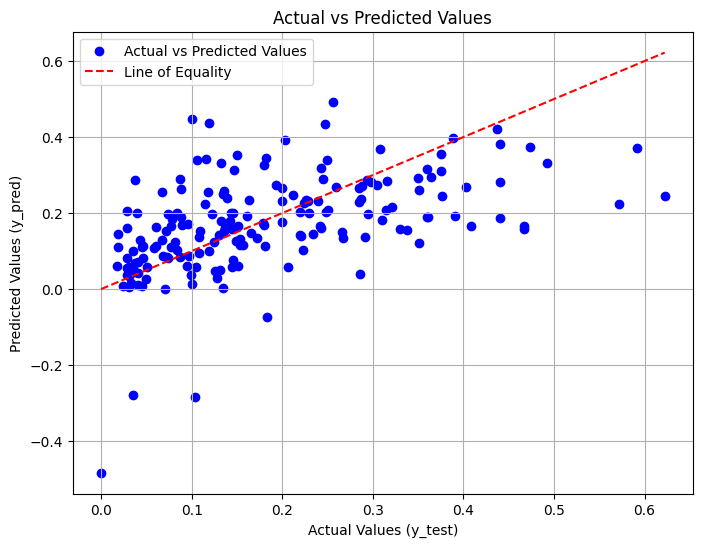

In [26]:
# Plot y_pred vs y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Line of Equality')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Creating a table including Difference between Predicted and Actual 

In [27]:
# y_pred must have shape (741,)
df2 = pd.DataFrame({'actual goals/game': y_test, 'predicted goals/game': y_pred})
df2

,actual goals/game,predicted goals/game
Player,,
Phil Kessel,0.182029,0.344300
Derek Grant,0.145912,0.201305
Daniel Sprong,0.285451,0.039582
Matt Roy,0.072010,0.153681
Evan Rodrigues,0.226039,0.234691
...,...,...
Travis Konecny,0.360088,0.315217
Alex Iafallo,0.229696,0.199683
Rasmus Kupari,0.077167,0.111257


In [28]:
df2['Actual Goals'] = round((df2['actual goals/game'] * 82), 2)
df2['Predicted Goals'] = round((df2['predicted goals/game'] * 82), 2)
df2['Difference(Actual - Predicted)'] = df2['Actual Goals'] - df2['Predicted Goals']
df2.sort_values(by='Predicted Goals', ascending=False).head(20)

,actual goals/game,predicted goals/game,Actual Goals,Predicted Goals,Difference(Actual - Predicted)
Player,,,,,
Roman Josi,0.256147,0.492084,21.00,40.349998,-19.349998
Jakub Voráček,0.100863,0.446800,8.27,36.639999,-28.369999
Seth Jones,0.119147,0.437563,9.77,35.880001,-26.110001
Alex Chiasson,0.247078,0.434952,20.26,35.669998,-15.409998
Alex DeBrincat,0.437598,0.421591,35.88,34.570000,1.310000
Brady Tkachuk,0.388882,0.396327,31.89,32.500000,-0.610000
Zach Werenski,0.202902,0.393062,16.64,32.230000,-15.590000
Timo Meier,0.440029,0.382170,36.08,31.340000,4.740000
Jake Guentzel,0.473206,0.375014,38.80,30.750000,8.050000


What is going on here?<br>
- Small sample size
- Too many independent features?
- should check correlation heatmap.
- probabaly need scaling and PCA

In [30]:
X.corr()

,Age,A/GP,PTS/GP,PPG/GP,PPA/GP,EvnG/GP,EvnA/GP,G/60,A/60,Shots/GP,...,FF/GP,FA/GP,FF%,SAtt/GP,Thru%,oiSH%,oZS%,dZS%,TK/GP,GV/GP
Age,1.000000,-0.000870,0.022430,0.054787,0.035242,0.054787,0.035242,-0.036343,0.021495,0.039037,...,0.055357,0.020503,0.072330,0.034216,0.036454,0.058858,-0.114164,0.114165,-0.013073,0.016069
A/GP,-0.000870,1.000000,0.916446,0.674428,0.891662,0.674428,0.891662,0.496610,0.926833,0.742919,...,0.642645,0.462429,0.409439,0.748493,0.099495,0.632088,0.526384,-0.526378,0.654593,0.609217
PTS/GP,0.022430,0.916446,1.000000,0.846298,0.863057,0.846298,0.863057,0.763819,0.919048,0.874173,...,0.562225,0.343436,0.445829,0.836211,0.253668,0.643534,0.547702,-0.547695,0.695887,0.536792
PPG/GP,0.054787,0.674428,0.846298,1.000000,0.683618,1.000000,0.683618,0.792185,0.696637,0.787182,...,0.356400,0.171189,0.346930,0.731692,0.267505,0.465005,0.472450,-0.472446,0.503506,0.358177
PPA/GP,0.035242,0.891662,0.863057,0.683618,1.000000,0.683618,1.000000,0.473131,0.834586,0.712093,...,0.576139,0.423580,0.346093,0.730025,0.055871,0.472520,0.542627,-0.542626,0.548906,0.568336
EvnG/GP,0.054787,0.674428,0.846298,1.000000,0.683618,1.000000,0.683618,0.792185,0.696637,0.787182,...,0.356400,0.171189,0.346930,0.731692,0.267505,0.465005,0.472450,-0.472446,0.503506,0.358177
EvnA/GP,0.035242,0.891662,0.863057,0.683618,1.000000,0.683618,1.000000,0.473131,0.834586,0.712093,...,0.576139,0.423580,0.346093,0.730025,0.055871,0.472520,0.542627,-0.542626,0.548906,0.568336
G/60,-0.036343,0.496610,0.763819,0.792185,0.473131,0.792185,0.473131,1.000000,0.611672,0.742368,...,0.092283,-0.134557,0.343603,0.621457,0.516866,0.415619,0.367040,-0.367034,0.491157,0.129604
A/60,0.021495,0.926833,0.919048,0.696637,0.834586,0.696637,0.834586,0.611672,1.000000,0.722722,...,0.452915,0.241688,0.405187,0.684023,0.246419,0.623135,0.549386,-0.549371,0.619513,0.472443
Shots/GP,0.039037,0.742919,0.874173,0.787182,0.712093,0.787182,0.712093,0.742368,0.722722,1.000000,...,0.581732,0.334672,0.501330,0.963894,0.282118,0.478842,0.520293,-0.520289,0.610288,0.492283


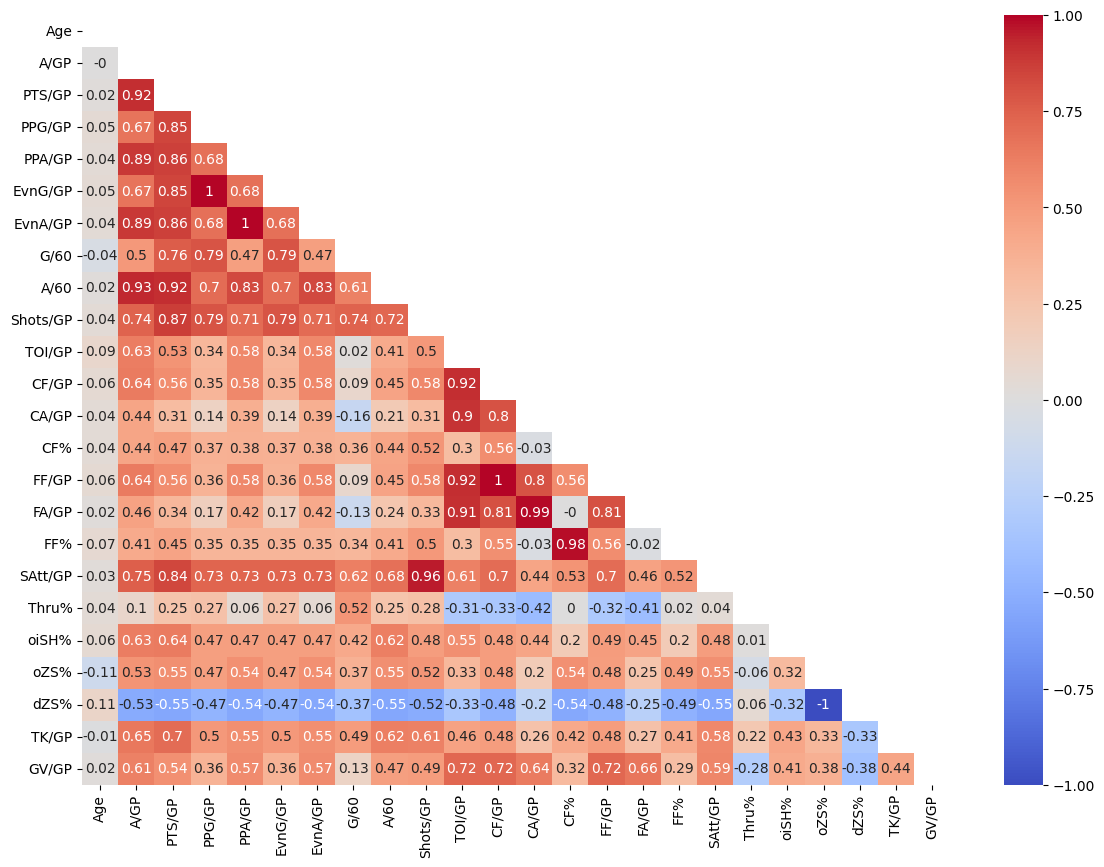

In [32]:
# Calculate all the correlations between each independent variable
import seaborn as sns
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(14,10))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()